In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/ProsperProject/

Mounted at /content/drive
/content/drive/My Drive/ProsperProject


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import itertools
import json
from sklearn.model_selection import train_test_split
from scipy import stats
from math import ceil
from tqdm import tqdm

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from sklearn.model_selection import KFold 
import sys

sys.path.append('/content/drive/My Drive/ProsperProject/code')

from boost_alg import boosting_warraper

In [105]:
kaggle_data = pd.read_csv('data/prosperKaggle.csv')
kaggle_data = kaggle_data[kaggle_data['CreditGrade'].notna()]

# feature_list = ['CreditGrade', 'TotalTrades', 'TotalInquiries', 'TradesOpenedLast6Months', 'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent', 'DelinquenciesLast7Years', 'InquiriesLast6Months',
# 'IncomeRange','RevolvingCreditBalance', 'BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'MemberKey', 'Term', 'Recommendations', 'CurrentlyInGroup',
# 'IsBorrowerHomeowner'] 

# feature_list = ['CreditGrade', 'TotalTrades', 'TotalInquiries', 'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent', 'IncomeRange', 'BorrowerRate', 
#                 'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'RevolvingCreditBalance',
#                 'Recommendations', 'CurrentlyInGroup','IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
#                 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
#                 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
#                 'DateCreditPulled', 'FirstRecordedCreditLine', 'ListingCategory (numeric)' ] 


feature_list = ['CreditGrade', 'TotalTrades', 'TotalInquiries', 'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent', 'IncomeRange', 'BorrowerRate', 
                'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'RevolvingCreditBalance',
                'Recommendations', 'CurrentlyInGroup','IsBorrowerHomeowner',  'ListingCategory (numeric)', 'DateCreditPulled', 'FirstRecordedCreditLine', 'Occupation', 'BorrowerState', # ]
                'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
                
                'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'EmploymentStatus', 'EmploymentStatusDuration',
                'LoanKey', 'ListingCreationDate', 'LoanStatus', 'MemberKey'
                ] 


kaggle_data = kaggle_data[feature_list]

print(kaggle_data.isnull().sum())
print(len(kaggle_data))

CreditGrade                                0
TotalTrades                             7544
TotalInquiries                          1159
AvailableBankcardCredit                 7544
BankcardUtilization                     7604
AmountDelinquent                        7622
IncomeRange                                0
BorrowerRate                               0
LoanOriginalAmount                         0
MonthlyLoanPayment                         0
StatedMonthlyIncome                        0
DebtToIncomeRatio                       1247
TradesNeverDelinquent (percentage)      7544
TradesOpenedLast6Months                 7544
RevolvingCreditBalance                  7604
Recommendations                            0
CurrentlyInGroup                           0
IsBorrowerHomeowner                        0
ListingCategory (numeric)                  0
DateCreditPulled                           0
FirstRecordedCreditLine                  697
Occupation                              2255
BorrowerSt

In [106]:
print(kaggle_data['LoanStatus'].value_counts())

Completed     18288
Chargedoff     6650
Defaulted      4010
Cancelled         5
Name: LoanStatus, dtype: int64


In [107]:
kaggle_data['BorrowerState'] = kaggle_data['BorrowerState'].fillna('unkown')

In [108]:
# prsper_history_vars = ['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding']
prsper_history_vars = ['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months']
kaggle_data[prsper_history_vars] = kaggle_data[prsper_history_vars].fillna(0)
print(kaggle_data.isnull().sum())

CreditGrade                               0
TotalTrades                            7544
TotalInquiries                         1159
AvailableBankcardCredit                7544
BankcardUtilization                    7604
AmountDelinquent                       7622
IncomeRange                               0
BorrowerRate                              0
LoanOriginalAmount                        0
MonthlyLoanPayment                        0
StatedMonthlyIncome                       0
DebtToIncomeRatio                      1247
TradesNeverDelinquent (percentage)     7544
TradesOpenedLast6Months                7544
RevolvingCreditBalance                 7604
Recommendations                           0
CurrentlyInGroup                          0
IsBorrowerHomeowner                       0
ListingCategory (numeric)                 0
DateCreditPulled                          0
FirstRecordedCreditLine                 697
Occupation                             2255
BorrowerState                   

In [109]:
kaggle_data['Occupation'] = kaggle_data['Occupation'].fillna('Other')

In [110]:
kaggle_data.isnull().sum(axis=1).value_counts()

0     20223
10     5192
11     1114
1      1105
14      596
12      559
13       68
6        57
4        20
15       13
9         2
8         2
7         1
2         1
dtype: int64

In [111]:
kaggle_data.dropna(inplace=True)
kaggle_data.isnull().sum(axis=1).value_counts()

0    20223
dtype: int64

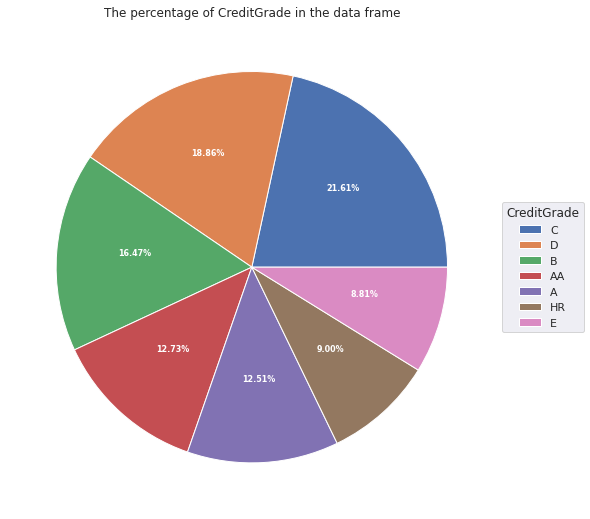

In [112]:
def calculate_percent(pct, allvals):
    return "{:.2f}%\n".format(pct)


def create_pie_attr(df: pd.DataFrame, col_name:str, fig_dir:str='plots'):
    col_percent = df[col_name].value_counts()/df.count()[col_name]*100
    col_label = [x for x in col_percent.keys()]
    data = [x for x in df[col_name].value_counts()]
    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: calculate_percent(pct, data),
                                      textprops=dict(color='w'))
    ax.legend(wedges, col_label, title=col_name, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(f"The percentage of {col_name} in the data frame")
    os.makedirs(fig_dir,exist_ok=True)
    plt.savefig(f"{fig_dir}/Distribution_of_{col_name}.png")


create_pie_attr(kaggle_data, 'CreditGrade')


In [113]:
def convert_date_month(date: str, base_year: int =1900):
    date = date.split(' ')[0]
    year, month, day = tuple(date.split('-'))
    return (int(year) - base_year) * 12 + int(month) + int(day) / 31


kaggle_data['DateCreditPulled'] = kaggle_data['DateCreditPulled'].apply(convert_date_month)
kaggle_data['FirstRecordedCreditLine'] = kaggle_data['FirstRecordedCreditLine'].apply(convert_date_month)
CreditHistoryLength = kaggle_data['DateCreditPulled'] - kaggle_data['FirstRecordedCreditLine']
kaggle_data.drop(columns=['DateCreditPulled', 'FirstRecordedCreditLine'], inplace=True)
kaggle_data.insert(len(kaggle_data.columns), 'CreditHistoryLength', CreditHistoryLength, True)
kaggle_data['ListingCreationDate'] = kaggle_data['ListingCreationDate'].apply(convert_date_month)


In [114]:
kaggle_data['EmploymentStatus'].value_counts()

Full-time        17902
Self-employed     1050
Part-time          766
Retired            411
Not employed        94
Name: EmploymentStatus, dtype: int64

In [115]:
kaggle_data.rename(columns={'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquent(percentage)'},inplace=True)

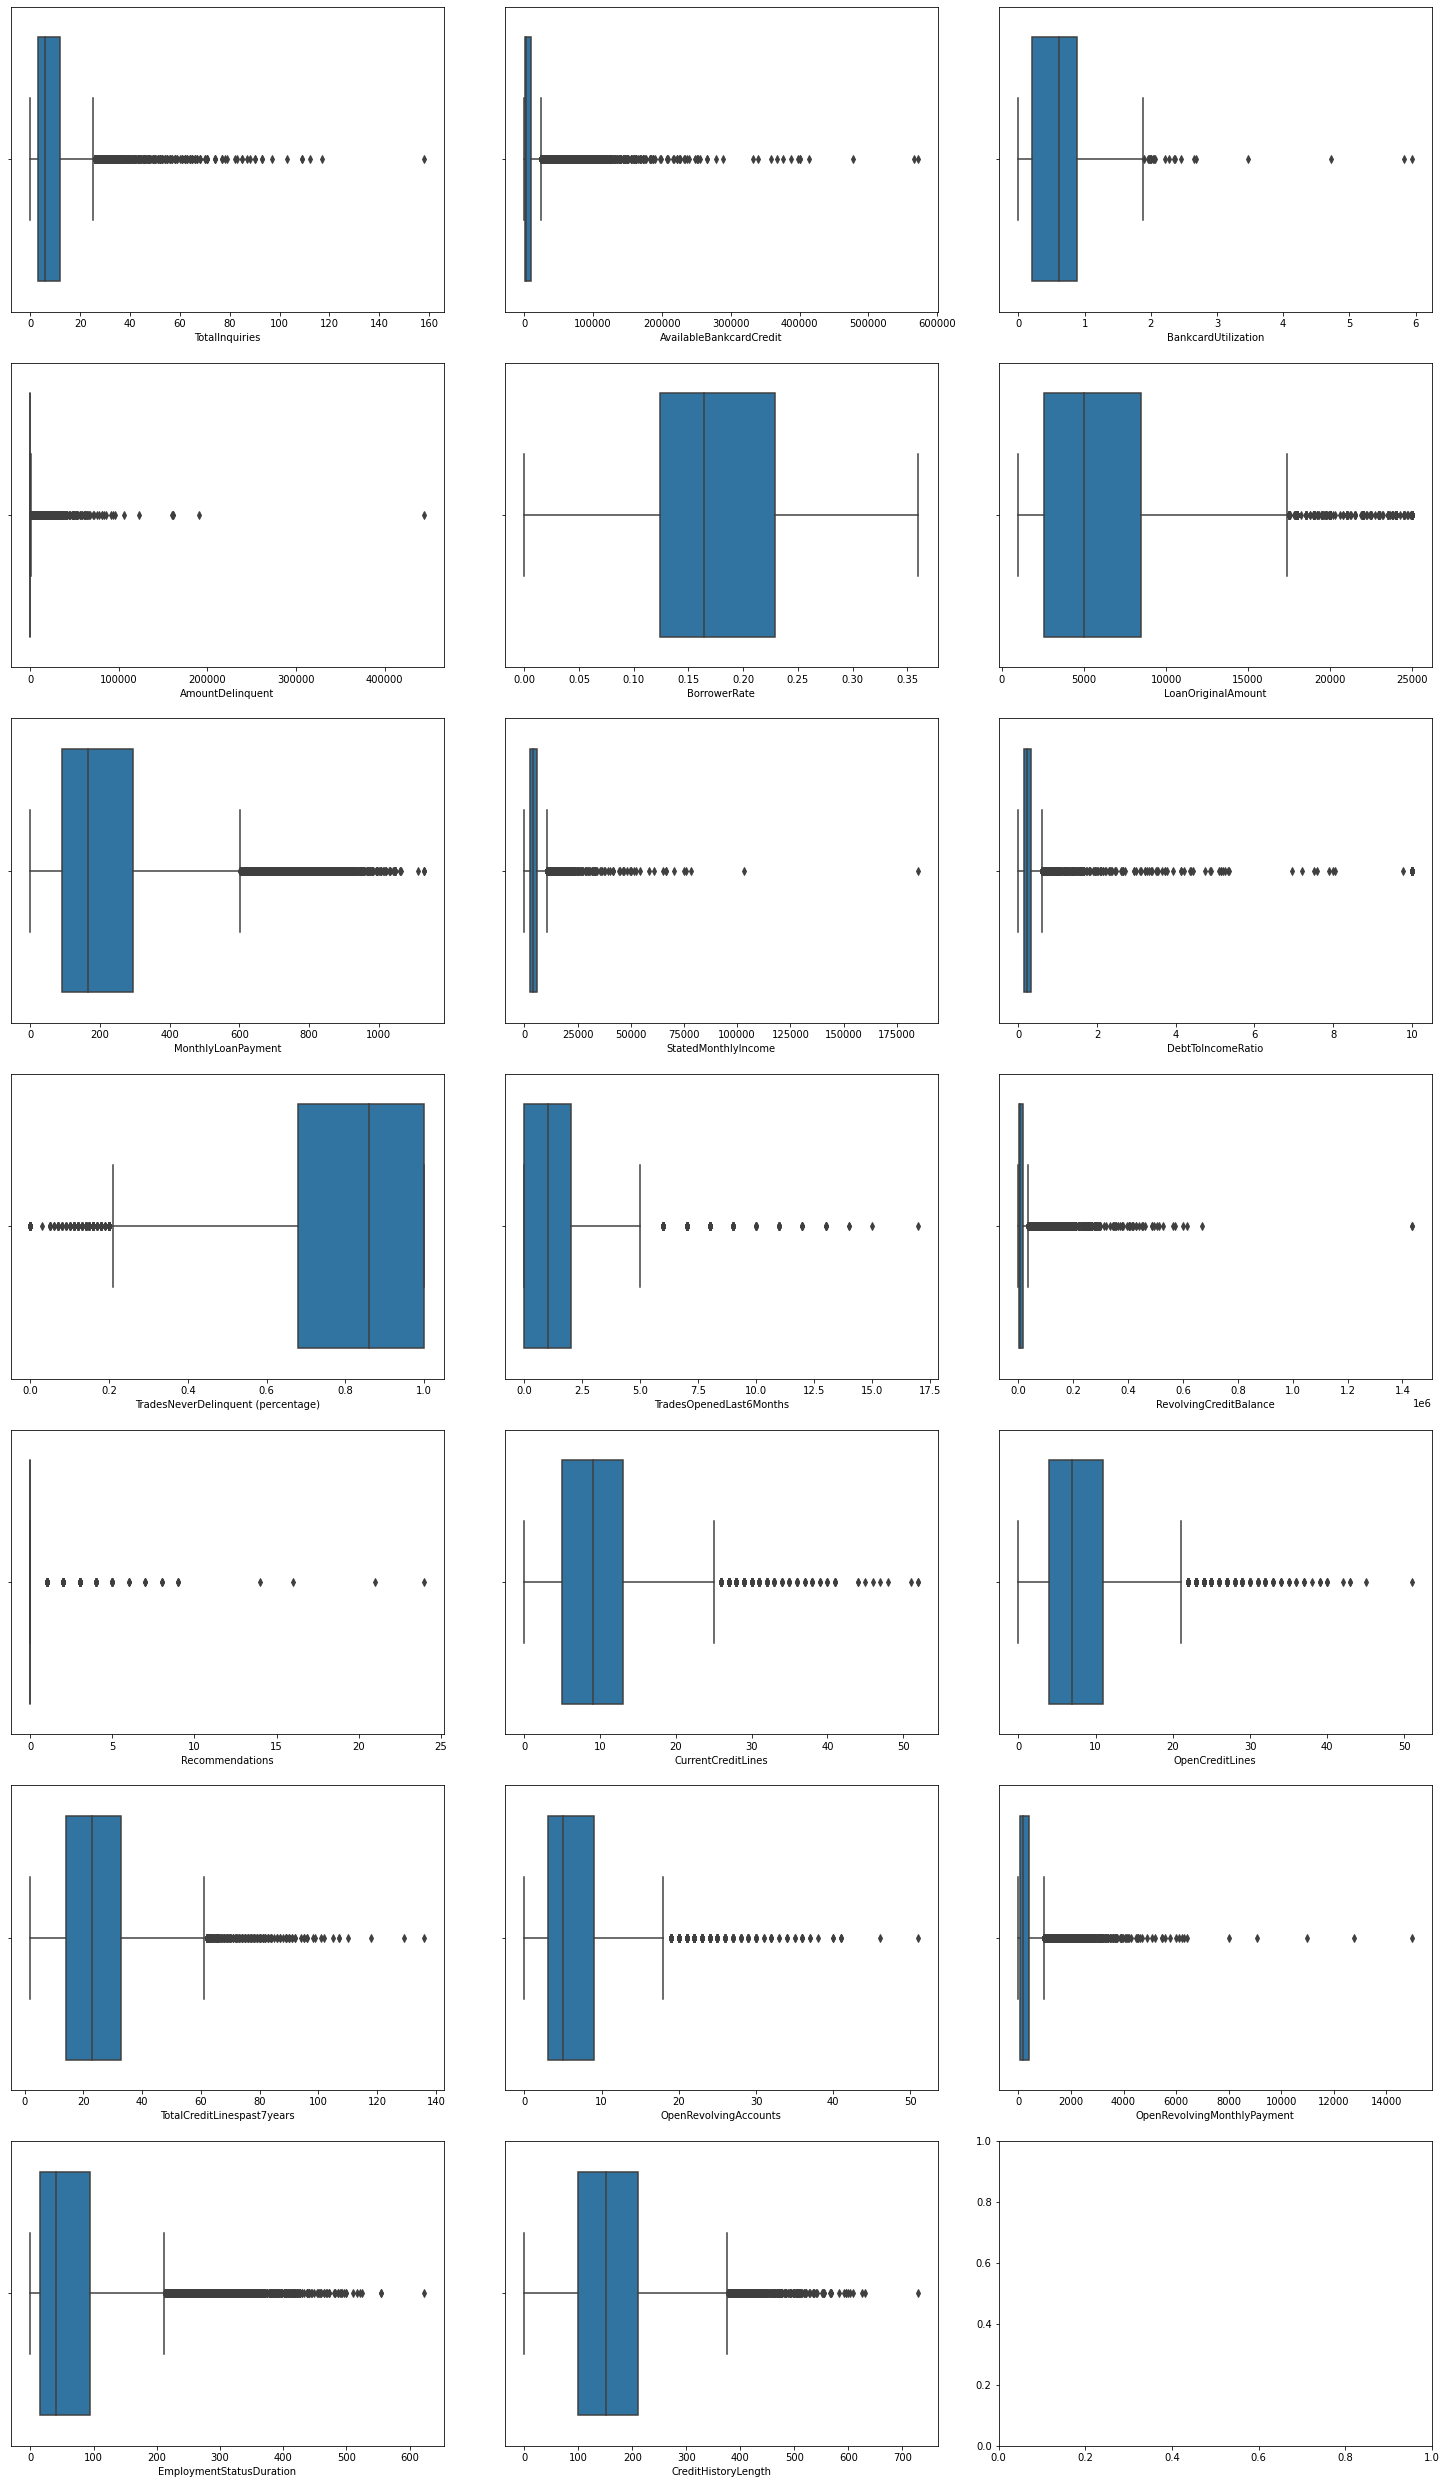

In [15]:
def show_boxplot(df, features_not_plot=[], num_columns_in_plot=3):
  df = df.drop(columns=features_not_plot)
  num_rows_in_plot = ceil(len(list(df.columns)) / num_columns_in_plot)
  fig, axes = plt.subplots(nrows=int(num_rows_in_plot), ncols=int(num_columns_in_plot))
  axes_flat = axes.reshape(-1)
  fig.set_size_inches(7 * num_columns_in_plot, 5 * num_rows_in_plot)
  fig.tight_layout(pad=3)
  for i, col in enumerate(list(df.columns)):
    sns.boxplot(x=df[col], ax=axes_flat[i])

features_not_boxplot = ['CreditGrade', 'MemberKey', 'IncomeRange', 'CurrentlyInGroup', 'IsBorrowerHomeowner',  'TotalTrades', 'ListingCategory (numeric)', 'Occupation', 'BorrowerState', 'LoanKey', 'ListingCreationDate', 'LoanStatus', 'EmploymentStatus'] + prsper_history_vars
show_boxplot(kaggle_data, features_not_boxplot)

In [116]:
print(kaggle_data.isnull().sum())

CreditGrade                            0
TotalTrades                            0
TotalInquiries                         0
AvailableBankcardCredit                0
BankcardUtilization                    0
AmountDelinquent                       0
IncomeRange                            0
BorrowerRate                           0
LoanOriginalAmount                     0
MonthlyLoanPayment                     0
StatedMonthlyIncome                    0
DebtToIncomeRatio                      0
TradesNeverDelinquent(percentage)      0
TradesOpenedLast6Months                0
RevolvingCreditBalance                 0
Recommendations                        0
CurrentlyInGroup                       0
IsBorrowerHomeowner                    0
ListingCategory (numeric)              0
Occupation                             0
BorrowerState                          0
TotalProsperLoans                      0
TotalProsperPaymentsBilled             0
OnTimeProsperPayments                  0
ProsperPaymentsL

In [117]:
kaggle_data = kaggle_data[kaggle_data["LoanStatus"] != "Cancelled"]

In [118]:
kaggle_data['EmploymentStatus'].value_counts()

Full-time        17901
Self-employed     1050
Part-time          766
Retired            411
Not employed        94
Name: EmploymentStatus, dtype: int64

In [119]:
def map_categorical_features(df:pd.DataFrame):

  if 'CreditGrade' in df.columns:
      df['CreditGrade'] = df['CreditGrade'].map({
          'C': 3, 'D': 2, 'B': 4, 'AA': 6, 'HR': 0, 'A': 5, 'E': 1, 'NC': -1
        })
  
  if 'IncomeRange' in df.columns:
      df['IncomeRange'] = df['IncomeRange'].map({
          '$0': 0, 'Not employed': 0, 'Not displayed': 0, '$1-24,999': 1, '$25,000-49,999': 2, 
          '$50,000-74,999': 3, '$75,000-99,999': 4, '$100,000+': 5
      })


  if 'CurrentlyInGroup' in df.columns:
      df['CurrentlyInGroup'] = df['CurrentlyInGroup'].map({
          False: -1, True: 1
      })

  if 'IsBorrowerHomeowner' in df.columns:
      df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].map({
          False: -1, True: 1
      })

  if 'LoanStatus' in df.columns:
    df['LoanStatus'] = df['LoanStatus'].map({
          'Completed': 1, 'Chargedoff': -1, 'Defaulted': -1, 'Past Due (1-15 days)': -1, 'Past Due (31-60 days)': -1, 'Past Due (61-90 days)': -1
    })

  if 'EmploymentStatus' in df.columns:
    df['EmploymentStatus'] = df['EmploymentStatus'].map({
        'Full-time': 4, 'Self-employed': 3, 'Part-time': 2, 'Retired': 1, 'Not employed': 0
    })

map_categorical_features(kaggle_data)


In [120]:
kaggle_data['LoanStatus'].value_counts()

 1    13062
-1     7160
Name: LoanStatus, dtype: int64

In [121]:
kaggle_data['EmploymentStatus'].value_counts()

4    17901
3     1050
2      766
1      411
0       94
Name: EmploymentStatus, dtype: int64

In [142]:
def split_df(df: pd.DataFrame, col_name: str):
    train_df, test_val = train_test_split(df, test_size=0.3, random_state=42, stratify=df[col_name])
    test_df, val_df = train_test_split(test_val, test_size=0.5, random_state=42, stratify=test_val[col_name])
    return train_df, val_df, test_df


train_df, val_df, test_df = split_df(kaggle_data, 'CreditGrade')

In [143]:
occupation_set = set([tup[1] for tup in list(kaggle_data['Occupation'].to_dict().items())])

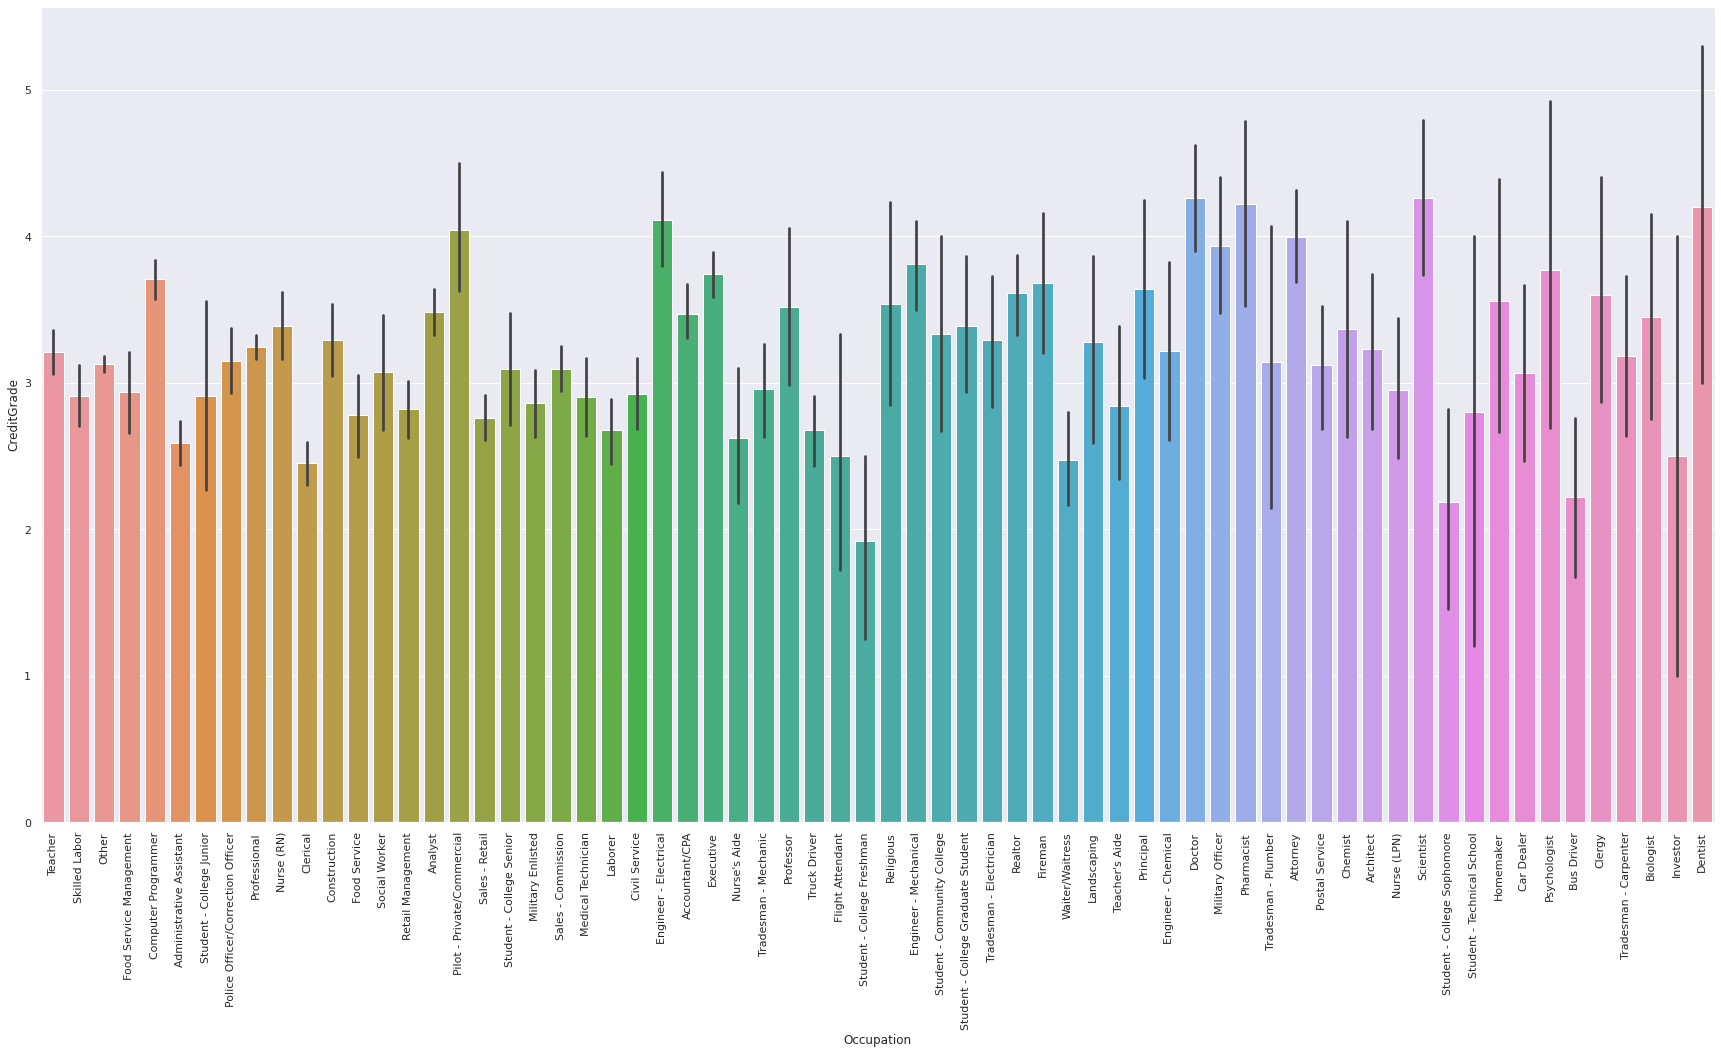

In [124]:
plt.figure(figsize=(30,15))
chart = sns.barplot(x="Occupation", y="CreditGrade", data=train_df)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

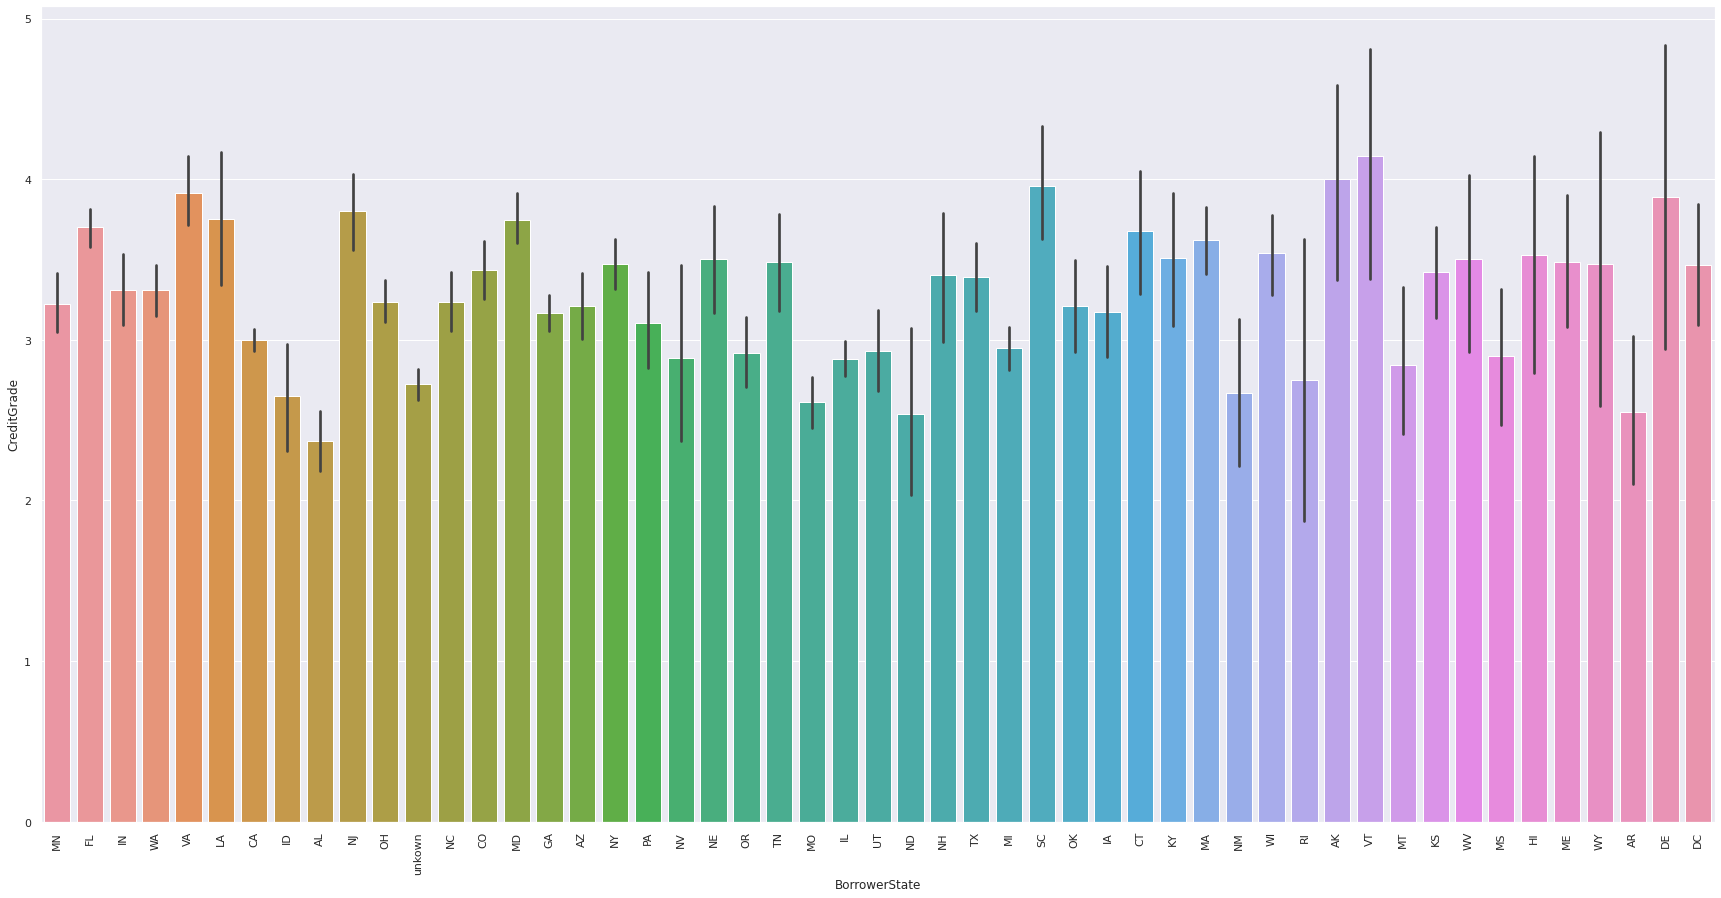

In [125]:
plt.figure(figsize=(30,15))
chart = sns.barplot(x='BorrowerState', y="CreditGrade", data=train_df)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [ ]:
# occupation_A = set(['Dentist', 'Pharmacist', 'Doctor', 'Engineer - Electrical', 'Pilot - Private/Commercial', 'Attorney']) # below 2
# occupation_B = set(['Executive', 'Nurse (RN)', 'Computer Programmer','Analyst', 'Realtor', 'Military Officer', 'Engineer - Mechanical', 'Accountant/CPA', 'Fireman', 'Student - College Graduate Student', 'Principal', 'Scientist', 'Professor' ]) # 2 < _ < 2.5
# occupation_C = set(['Sales - Commission', 'Nurse (LPN)', 'Professional', 'Other', 'Social Worker', 'Tradesman - Mechanic', 'Student - College Senior', 'Teacher', 'Police Officer/Correction Officer', 'Engineer - Chemical', 'Food Service Management', 'Construction', 'Clergy', 'Biologist', 'Homemaker', 'Landscaping', 'Tradesman - Carpenter', 'Car Dealer', 'Architect', 'Tradesman - Electrician', 'Psychologist', 'Chemist', 'Religious' ]) # 2.5 < _ < 3
# occupation_D = set(['Truck Driver', 'Sales - Retail','Administrative Assistant', 'Retail Management', 'Military Enlisted', 'Medical Technician', 'Civil Service', 'Waiter/Waitress', 'Sales - Retail''Truck Driver',  'Postal Service',  'Skilled Labor',  'Food Service', "Teacher's Aide", 'Student - College Junior', 'Student - Community College', 'Tradesman - Plumber']) # <3 _ < 3.5,  
# occupation_E = set(['Laborer', 'Clerical',  'Flight Attendant', 'Bus Driver', "Nurse's Aide", 'Student - College Sophomore', 'Student - College Freshman', 'Student - Technical School', 'Investor']) # 3.5 above

In [ ]:
# occupation_setA_E = occupation_A.union(occupation_B, occupation_C, occupation_D, occupation_E)
# occupation_set.difference(occupation_setA_E)

# print(len(occupation_A) + len(occupation_B) + len(occupation_C) + len(occupation_D) + len(occupation_E))

set()

In [126]:
def replace_column(df, col_name, new_col_name, val_dict):
  df[col_name] = df[col_name].map(val_dict).astype(np.float64)
  return df.rename(columns={col_name: new_col_name}, inplace=True)

In [144]:
mean_occupation_grade_dict = (train_df.groupby('Occupation')['CreditGrade'].mean()).to_dict()
replace_column(train_df, 'Occupation', 'OccupationCGAvg', mean_occupation_grade_dict)
replace_column(val_df, 'Occupation', 'OccupationCGAvg', mean_occupation_grade_dict)
replace_column(test_df, 'Occupation', 'OccupationCGAvg', mean_occupation_grade_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [145]:
mean_occupation_grade_dict = (train_df.groupby('BorrowerState')['CreditGrade'].mean()).to_dict()
replace_column(train_df, 'BorrowerState', 'BorrowerStateCGAvg', mean_occupation_grade_dict)
replace_column(val_df, 'BorrowerState', 'BorrowerStateCGAvg', mean_occupation_grade_dict)
replace_column(test_df, 'BorrowerState', 'BorrowerStateCGAvg', mean_occupation_grade_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


lets drop zeros

In [146]:
def add_feature_indicatir_columns(df: pd.DataFrame, col_name: str):
  indicator_arr = np.zeros(len(df))
  indicator_arr[df[col_name] == 0] = 1
  df.insert(len(list(df.columns)), col_name + '_indicator', list(indicator_arr), True)

In [147]:
add_feature_indicatir_columns(train_df, 'AvailableBankcardCredit')
add_feature_indicatir_columns(val_df, 'AvailableBankcardCredit')
add_feature_indicatir_columns(test_df, 'AvailableBankcardCredit')

In [148]:
add_feature_indicatir_columns(train_df, 'DebtToIncomeRatio')
add_feature_indicatir_columns(val_df, 'DebtToIncomeRatio')
add_feature_indicatir_columns(test_df, 'DebtToIncomeRatio')

In [ ]:
# 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'TradesNeverDelinquent (percentage)', 'RevolvingCreditBalance'
# train_df = train_df[(train_df['AvailableBankcardCredit'] > 0) & (train_df['DebtToIncomeRatio'] > 0) & (train_df['RevolvingCreditBalance'] > 0)]
# val_df = val_df[(val_df['AvailableBankcardCredit'] > 0) & val_df['DebtToIncomeRatio'] > 0 & (val_df['RevolvingCreditBalance'] > 0)]




In [30]:
print(len(train_df))
print(len(val_df))

14155
3034


In [149]:
train_df.columns

Index(['CreditGrade', 'TotalTrades', 'TotalInquiries',
       'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent',
       'IncomeRange', 'BorrowerRate', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio',
       'TradesNeverDelinquent(percentage)', 'TradesOpenedLast6Months',
       'RevolvingCreditBalance', 'Recommendations', 'CurrentlyInGroup',
       'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'OccupationCGAvg',
       'BorrowerStateCGAvg', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'EmploymentStatu

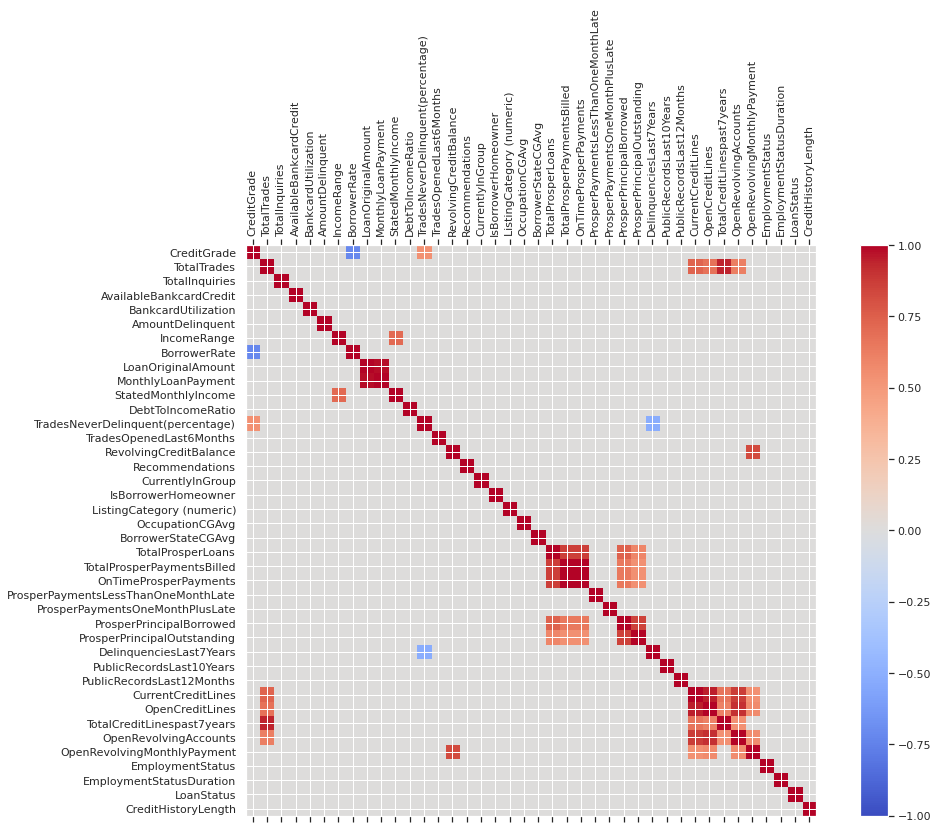

In [133]:
def calc_corr(df, path, threshold=0.9):
    corr = df.corr()
    m = (corr >= threshold) | (corr <= -threshold)
    corr = corr.where(m, 0)
    fig = plt.figure()
    fig.set_size_inches(15.5, 10.5)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(df.columns), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.savefig(path)

    corr_array = corr.to_numpy()
    rows, columns = np.where(corr_array > 0)
    res = set()
    for i in range(len(rows)):
        if rows[i] == columns[i]:
            continue
        pearson = corr.iloc[rows[i], columns[i]]
        pair = set()
        pair.add(corr.columns.values[rows[i]])
        pair.add(corr.columns.values[columns[i]])
        if corr.columns.values[rows[i]] > corr.columns.values[columns[i]]:
            res.add((corr.columns.values[rows[i]], corr.columns.values[columns[i]], pearson))
        else:
            res.add((corr.columns.values[columns[i]], corr.columns.values[rows[i]], pearson))
    res = list(map(lambda x: (x[0], x[1]), sorted(res, key=lambda x: x[2], reverse=True)))
    return res




linear_correlated_features = calc_corr(train_df.drop(columns=['MemberKey', 'AvailableBankcardCredit_indicator', 'DebtToIncomeRatio_indicator', 'LoanKey', 'ListingCreationDate']), "plots\corr.png", threshold=0.5)

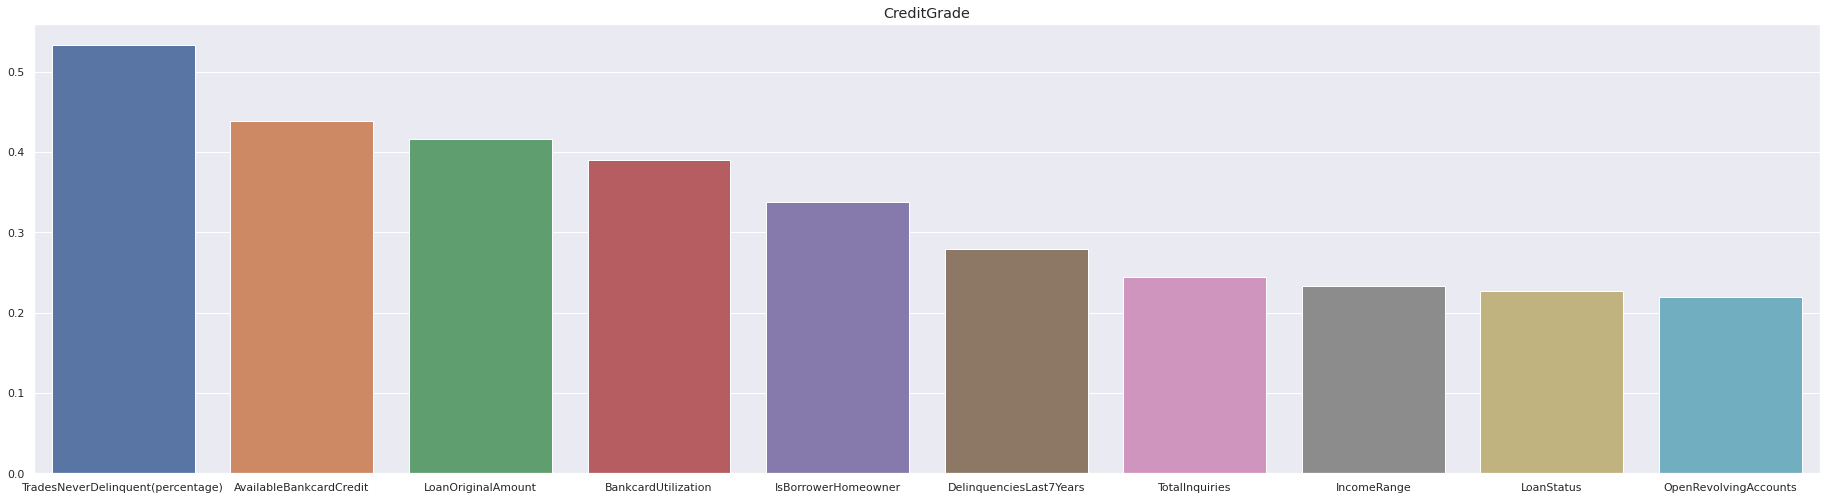

In [134]:
def top_correlated_features(df: pd.DataFrame, target_feature='CreditGrade', n=10):
  df_mean = df - df.mean()
  y_data = df_mean[target_feature]
  data_features = df_mean.drop(columns=[target_feature])
  corr_coef = np.array(((data_features.T * y_data).T.sum() / (((data_features ** 2).sum() ** 0.5) * (y_data ** 2).sum() ** 0.5)).abs())
  features_indeces = corr_coef.argsort()[::-1][:n].tolist()
  corr_list, features_name_list = corr_coef[features_indeces], data_features.columns[features_indeces]
  feature_corr_df = pd.DataFrame(np.array(corr_list).reshape(1, -1).tolist(), columns=features_name_list)

  sns.set(rc={'figure.figsize':(32,8.27)})
  ax = sns.barplot(data=feature_corr_df, orient='v')
  ax.set_title(target_feature, fontsize='large')


top_correlated_features(train_df.drop(columns=['BorrowerRate', 'MonthlyLoanPayment', 'MemberKey', 'AvailableBankcardCredit_indicator', 'DebtToIncomeRatio_indicator', 'LoanKey', 'ListingCreationDate']))

In [136]:
def plot_histogram(df:pd.DataFrame, path, num_columns_in_plot=4):
    if not os.path.exists(path):
        os.mkdir(path)
    num_rows_in_plots = ceil(len(df.columns) /  num_columns_in_plot)
    fig, axes = plt.subplots(nrows=num_rows_in_plots, ncols=num_columns_in_plot)
    axes_flat = axes.reshape(-1)
    fig.set_size_inches(5 * num_columns_in_plot, 5 * num_rows_in_plots)
    fig.tight_layout(pad=3)
    for i, features in enumerate(df.columns.values):
        ax = axes_flat[i]
        ax.set_title(features)
        ax.grid()
        array = df[features].to_numpy()
        array = array[~np.isnan(array)]
        ax.hist(array, 100)
        plt.savefig(os.path.join(path, features + ".png"))

                                 
plot_histogram(train_df.drop(columns=['MemberKey', 'AvailableBankcardCredit_indicator', 'DebtToIncomeRatio_indicator', 'LoanKey']), path='plots/histograms')   

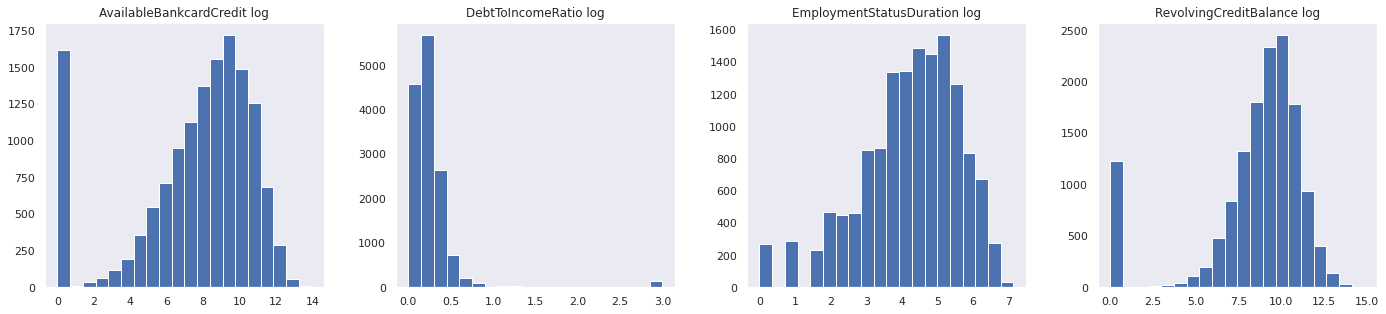

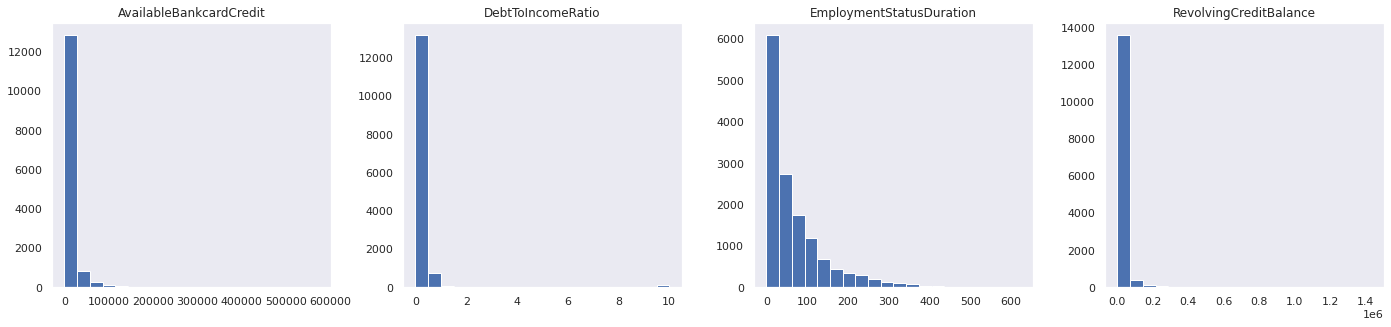

In [137]:
def inv_hyperbolic_sine(column):
  return np.log(column + (column ** 2 + 1) ** 0.5 )

def calc_log_column(column, epsilon=2):
    # return np.log(column + epsilon)
    return inv_hyperbolic_sine(column)


def plot_log_histogram(df: pd.DataFrame, column_list, path='plots/histograms'):
    rename_dict = dict()
    for col_name in column_list:
        rename_dict[col_name] = col_name + ' log'

    copy_df = df.copy()
    # filter_df = copy_df.filter(column_list)
    filter_df = copy_df[column_list]
    filter_df = filter_df.rename(columns=rename_dict, inplace=False)
    for column in filter_df.columns:
        filter_df.loc[:, column] = calc_log_column(filter_df[column])
    plot_histogram(filter_df, path, num_columns_in_plot=len(column_list))
    plot_histogram(copy_df[column_list], path, num_columns_in_plot=len(column_list))

    
log_features = ['AvailableBankcardCredit', 'DebtToIncomeRatio', 'EmploymentStatusDuration', 'RevolvingCreditBalance']
plot_log_histogram(train_df, log_features)

In [150]:
def normalization_column(train_df, val_df, test_df, column_list):
    dfs = [train_df, val_df, test_df]
    for column in column_list:
        
        v_min = train_df[column].min()
        v_max = train_df[column].max()
        for df in dfs:
            df.loc[:, column] = -1 + (2 * (df.loc[:, column] - v_min)) / (v_max - v_min)
    return train_df, val_df, test_df


def standardization_column(train_df, val_df, test_df, column_list):
    dfs = [train_df, val_df, test_df]
    for column in column_list:
        std = train_df[column].std()
        mean = train_df[column].mean()
        for df in dfs:
            df.loc[:, column] = (df.loc[:, column] - mean) / std
    return train_df, val_df, test_df


def normilized_fetures(train_df, val_df, test_df):
    normlized_features_list = ['BankcardUtilization', 'Recommendations', 'ListingCreationDate'] + prsper_history_vars
    log_standardization_features_list = ['AvailableBankcardCredit', 'DebtToIncomeRatio', 'RevolvingCreditBalance', 'EmploymentStatusDuration']
    standardization_features_list = ['TotalTrades', 'TotalInquiries', 'IncomeRange', 'AmountDelinquent', 'BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome',
                                      'CreditHistoryLength', 'OccupationCGAvg', 'BorrowerStateCGAvg' , 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment'
                                     ]
    train_df, val_df, test_df = normalization_column(train_df, val_df, test_df, normlized_features_list)
    for feature in log_standardization_features_list:
        for df in [train_df, val_df, test_df]:
          df.loc[:, feature] = calc_log_column(df[feature])
    standardization_features_list += log_standardization_features_list
    train_df, val_df, test_df = standardization_column(train_df, val_df, test_df, column_list=standardization_features_list)
    return train_df, val_df, test_df


train_df, val_df, test_df = normilized_fetures(train_df, val_df, test_df)
# plot_histogram(train_df, path='plots/histograms') 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [156]:
print(train_df.isnull().sum())

CreditGrade                            0
TotalTrades                            0
TotalInquiries                         0
AvailableBankcardCredit                0
BankcardUtilization                    0
AmountDelinquent                       0
IncomeRange                            0
BorrowerRate                           0
LoanOriginalAmount                     0
MonthlyLoanPayment                     0
StatedMonthlyIncome                    0
DebtToIncomeRatio                      0
TradesNeverDelinquent(percentage)      0
TradesOpenedLast6Months                0
RevolvingCreditBalance                 0
Recommendations                        0
CurrentlyInGroup                       0
IsBorrowerHomeowner                    0
OccupationCGAvg                        0
BorrowerStateCGAvg                     0
TotalProsperLoans                      0
TotalProsperPaymentsBilled             0
OnTimeProsperPayments                  0
ProsperPaymentsLessThanOneMonthLate    0
ProsperPaymentsO

In [152]:
train_df = pd.get_dummies(train_df, columns=['ListingCategory (numeric)'], prefix='Listing_Category')
val_df = pd.get_dummies(val_df, columns=['ListingCategory (numeric)'], prefix='Listing_Category')
test_df = pd.get_dummies(test_df, columns=['ListingCategory (numeric)'], prefix='Listing_Category')

In [155]:
train_df = pd.get_dummies(train_df, columns=['EmploymentStatus'], prefix='Employment_Status')
val_df = pd.get_dummies(val_df, columns=['EmploymentStatus'], prefix='Employment_Status')
test_df = pd.get_dummies(test_df, columns=['EmploymentStatus'], prefix='Employment_Status')

In [157]:
train_df.to_csv('train_pre2009.csv', index=False)
val_df.to_csv('val_pre2009.csv', index=False)
test_df.to_csv('test_pre2009.csv', index=False)

In [ ]:
train_df = pd.read_csv('train_pre2009.csv')
val_df = pd.read_csv('val_pre2009.csv')
test_df = pd.read_csv('test_pre2009.csv')

In [158]:
train_df.columns

Index(['CreditGrade', 'TotalTrades', 'TotalInquiries',
       'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent',
       'IncomeRange', 'BorrowerRate', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio',
       'TradesNeverDelinquent(percentage)', 'TradesOpenedLast6Months',
       'RevolvingCreditBalance', 'Recommendations', 'CurrentlyInGroup',
       'IsBorrowerHomeowner', 'OccupationCGAvg', 'BorrowerStateCGAvg',
       'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'EmploymentStatusDuration', 'LoanKey', 'Listi

In [195]:
def evaluate(train_set, val_set, model, model_name: str, target_label='CreditGrade'):
  X = train_set.drop(columns=[target_label])
  y = train_set[target_label]
  model.fit(X, y)
  y_val = val_set[target_label]
  X_val = val_set.drop(columns=[target_label])
  score = model.score(X_val, y_val)
  y_pred = model.predict(X_val)
  mse = ((y_pred - y_val) ** 2).sum() / len(y_val)
  
  print(f'{model_name} score is {score}')
  print(f'mse is {mse}')
  return score


def evaluate_many_classifier(list_to_keep, train_set, val_set, target_label='CreditGrade'):
  random_forest = RandomForestRegressor()
  linear_reg = LinearRegression()
  svr = SVR(C=100, kernel='poly', degree=2, epsilon=1)
  mlp = MLPRegressor()
  # xgb_reg = xgb_warraper(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
  #               max_depth = 10, alpha = 10, n_estimators = 100)
  xgb_hyper_parms = {
      'objective' : 'reg:squarederror', 
      'colsample_bytree' : 0.3, 
      'learning_rate' : 0.1,
      'max_depth' : 10, 
      'alpha' : 10, 
      'n_estimators' : 100
  }

  lgbm_hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 1000,
    "n_estimators": 100
}
  xgb_reg = boosting_warraper(boosting_method_init_func=xgb.XGBRegressor, hyper_params=xgb_hyper_parms)
  lgbm_reg = boosting_warraper(boosting_method_init_func=lgb.LGBMRegressor, hyper_params=lgbm_hyper_params)
  weight_models_dict = {
      'XGB': 3,
      'lgbm': 3,
      'random forest': 3,
      'svm': 0,
      'mlp': 2,
      'linear reg': 0,
      'sum': 11
  }

  score = 0
  score += weight_models_dict['XGB'] * evaluate(train_set[list_to_keep], val_set[list_to_keep], xgb_reg, 'XGB', target_label)
  score += weight_models_dict['lgbm'] * evaluate(train_set[list_to_keep], val_set[list_to_keep], lgbm_reg, 'lgbm', target_label)
  score += weight_models_dict['random forest'] * evaluate(train_set[list_to_keep], val_set[list_to_keep], random_forest, 'random forest', target_label)
  score += weight_models_dict['linear reg'] * evaluate(train_set[list_to_keep], val_set[list_to_keep], linear_reg, 'linear reg', target_label)
  score += weight_models_dict['mlp'] * evaluate(train_set[list_to_keep], val_set[list_to_keep], mlp, 'mlp', target_label)
  score += weight_models_dict['svm'] * evaluate(train_set[list_to_keep], val_set[list_to_keep], svr, 'svm')
 
  print(f"weighted voting of the models: {score / weight_models_dict['sum']}")
  


In [197]:
# list_to_keep = ['CreditGrade', 'TotalTrades', 'TotalInquiries',
#        'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent',
#        'IncomeRange', 'LoanOriginalAmount',
#        'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio',
#        'TradesNeverDelinquent(percentage)', 'TradesOpenedLast6Months',
#        'RevolvingCreditBalance', 'CurrentlyInGroup',
#        'IsBorrowerHomeowner', 'OccupationCGAvg', 'BorrowerStateCGAvg',
#        'TotalProsperLoans', 'TotalProsperPaymentsBilled',
#        'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
#        'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
#        'ProsperPrincipalOutstanding', 'DelinquenciesLast7Years',
#        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
#        'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
#        'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
#        'CreditHistoryLength',
#        'AvailableBankcardCredit_indicator', 'DebtToIncomeRatio_indicator',
#        'Listing_Category_0', 'Listing_Category_1', 'Listing_Category_2',
#        'Listing_Category_3', 'Listing_Category_4', 'Listing_Category_5',
#        'Listing_Category_6', 'Listing_Category_7',
#        'EmploymentStatusDuration', 'Employment_Status_0',
#        'Employment_Status_1', 'Employment_Status_2', 'Employment_Status_3',
#        'Employment_Status_4']


list_to_keep = ['CreditGrade', 'TotalTrades', 'TotalInquiries',
       'AvailableBankcardCredit', 'BankcardUtilization', 'AmountDelinquent',
       'IncomeRange', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio',
       'TradesNeverDelinquent(percentage)', 'TradesOpenedLast6Months',
       'RevolvingCreditBalance', 'CurrentlyInGroup',
       'IsBorrowerHomeowner', 'OccupationCGAvg', 'BorrowerStateCGAvg',
       #'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'CreditHistoryLength',

       'Listing_Category_0', 'Listing_Category_1', 'Listing_Category_2',
       'Listing_Category_3', 'Listing_Category_4', 'Listing_Category_5',
       'Listing_Category_6', 'Listing_Category_7',

       ]
        
       
evaluate_many_classifier(list_to_keep, train_df, val_df)

XGB score is 0.782634586181827
mse is 0.6812452405140769


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


lgbm score is 0.7996440869324373
mse is 0.6279357409652344
random forest score is 0.7624326935643295
mse is 0.7445600197758735
linear reg score is 0.7227937104011124
mse is 0.868792611081076


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mlp score is 0.7913358962541495
mse is 0.6539744527246018
svm score is 0.7268706567204295
mse is 0.8560150480498684
weighted voting of the models: 0.78334599023128


In [ ]:
list_to_keep = list(train_df.drop(columns=['BorrowerRate', 'MonthlyLoanPayment']).columns)
X = train_df[list_to_keep].drop(columns=['CreditGrade'])
y = train_df['CreditGrade']
random_forest = RandomForestRegressor(n_estimators=100).fit(X, y)
print('random forest feature importance:')
feature_tup_list = [t for t in zip(list(random_forest.feature_importances_), list(X.columns))]
print(list(reversed(sorted(feature_tup_list, key=lambda x: x[0]))))

random forest feature importance:
[(0.4240231513591911, 'AvailableBankcardCredit'), (0.10654592195601922, 'LoanOriginalAmount'), (0.08163640475410015, 'TradesNeverDelinquent (percentage)'), (0.06331228347416593, 'BankcardUtilization'), (0.051693542117951435, 'TotalInquiries'), (0.037085341647353456, 'CreditHistoryLength'), (0.033389941531896596, 'IsBorrowerHomeowner'), (0.016489501762655432, 'DebtToIncomeRatio'), (0.0163978618405135, 'BorrowerStateCGAvg'), (0.014884067892862245, 'RevolvingCreditBalance'), (0.014245093292663637, 'OpenRevolvingAccounts'), (0.013953803837274294, 'OpenRevolvingMonthlyPayment'), (0.013895825615755137, 'StatedMonthlyIncome'), (0.01237960597055539, 'OpenCreditLines'), (0.012031121471747308, 'TotalTrades'), (0.011283446365905316, 'TotalCreditLinespast7years'), (0.010944416845397908, 'OccupationCGAvg'), (0.010616721044323294, 'AmountDelinquent'), (0.009388525578478515, 'TradesOpenedLast6Months'), (0.009100254983211062, 'CurrentCreditLines'), (0.0081212882666299